In [5]:
#importing all packages
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math
from matplotlib import cm

In [6]:
# Reading all the data in the data file
df = pd.read_csv("data/HW3_data.csv")
df.head()

,1.721886187638598642e+01,2.083899914536340248e+01,1.196843043213074687e+01,8.080479525889009551e+01,8.384866222967521310e+01,6.762954348177315467e+01,7.081912732340852301e+01,6.984695955879860207e+01,7.957042155906418657e+01,8.293534571756080709e+01,...,-9.998445882826635511e+01,-9.442643891082614971e+01,-1.600448759853948388e+01,-1.995782111019427418e+01,-8.775676463736202493e+01,-5.945101223761739107e+01,-9.180508809525416325e+01,-9.791610675942646935e+01,-4.938889979673914610e+01,-5.623604129101311599e+01
0,-17.215958,20.8366,11.964252,80.804176,83.848066,-67.628804,-70.818421,69.846244,79.569793,82.934743,...,99.983959,94.425909,16.001363,19.955316,-87.756195,-59.450171,91.804543,-97.915596,49.387887,56.235152


In [7]:
# Since the data is not formatted properly, reformatting for better look and understanding
df1 = df.T.reset_index()

In [8]:
df1.columns = ["x","y"]

In [9]:
df1

,x,y
0,1.721886187638598642e+01,-17.215958
1,2.083899914536340248e+01,20.836600
2,1.196843043213074687e+01,11.964252
3,8.080479525889009551e+01,80.804176
4,8.384866222967521310e+01,83.848066
...,...,...
15995,-5.945101223761739107e+01,-59.450171
15996,-9.180508809525416325e+01,91.804543
15997,-9.791610675942646935e+01,-97.915596
15998,-4.938889979673914610e+01,49.387887


In [13]:
# x values are being interpreted as string, so converting to float
df1['x'] = df1['x'].astype(float)

In [14]:
# Since we are to compute net loss, summing over the values of x and y
x = df1.x.values.sum()
y = df1.y.values.sum()

In [15]:
x, y

(-2037.7810591835296, 4438.637211839343)

In [18]:
# Creating a grid to be able to plot 3d plot
l1grid = np.linspace(-15, 15, 100)
l2grid = np.linspace(-15, 15, 100)

In [19]:
L1, L2 = np.meshgrid(l1grid, l2grid)

In [20]:
# Our main loss function is as follows, y*y - x*x can be replaced with -0.1

In [23]:
f1 = lambda lam1, lam2: ((0.000045)*(lam2*lam2)*y) - ((0.000098)*(lam1*lam1)*x) + ((0.003926)*lam1*x*np.exp((-0.1)*((lam1*lam1) + (lam2*lam2))))

In [24]:
Z1 = f1(L1, L2)

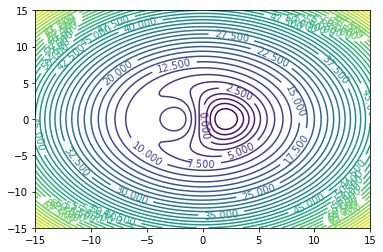

In [26]:
#Oberving the contours,we can clearly see that edges are rising, there is a depression and a raise in the middle, 
#correspding to local maxima and global minima
contours = plt.contour(L1, L2, Z1, 40)
plt.clabel(contours, inline=1, fontsize=10);

### Please see saddle point marked as S below

Text(-5.363249260275279, 0, 'S')

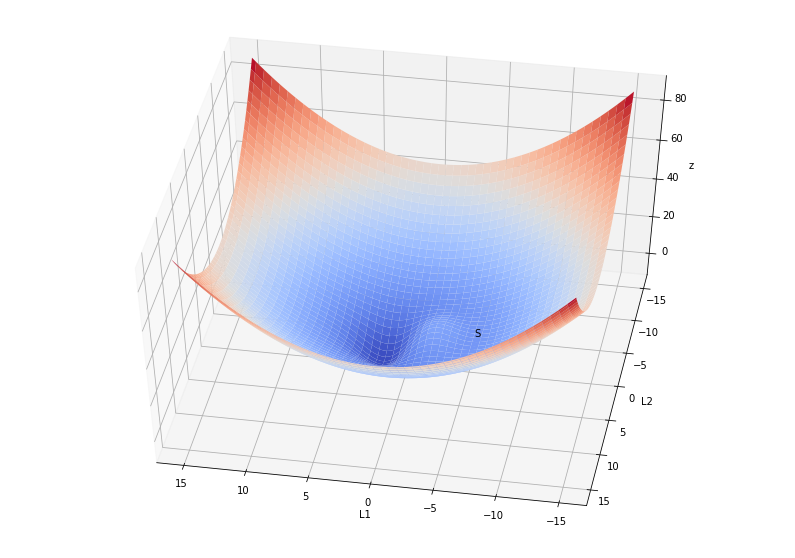

In [31]:
# The point S marks the saddle point, this has been derived from gradient descent
# I was not able to calculate saddle using Hessian
# It occurs as lambda 1, lambda2 = (-5.363249260275279,0)
saddle_location = f1(-5.363249260275279,0)
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(L1, L2, Z1, linewidth=0, cmap=cm.coolwarm)
ax.set_xlabel('L1')
ax.set_ylabel('L2')
ax.set_zlabel('z')
ax.view_init(elev=50, azim=100)
ax.text(-5.363249260275279, 0, saddle_location,"S")


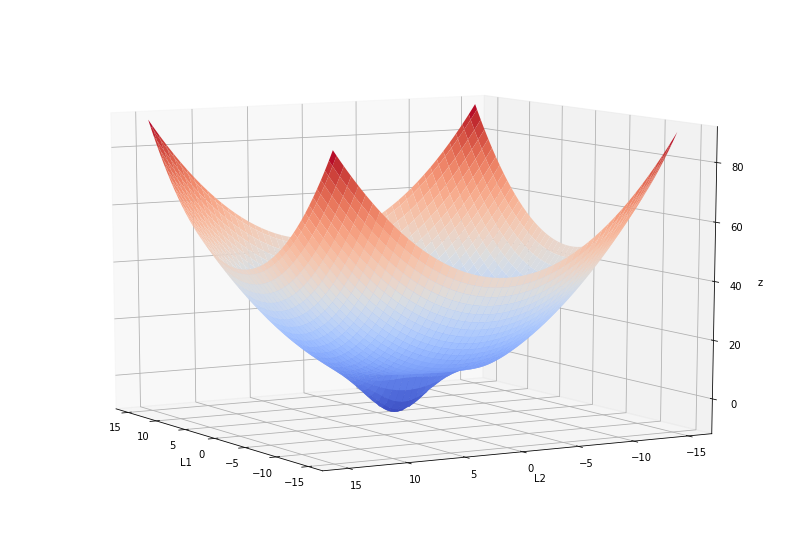

In [32]:
# This is the same plot as above, changing viewing angle to oberve global minima better
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(L1, L2, Z1, linewidth=0, cmap=cm.coolwarm )
ax.set_xlabel('L1')
ax.set_ylabel('L2')
ax.set_zlabel('z')
ax.view_init(elev=10, azim=150)

In [38]:
#This is the main gradient descent function
precision = 0.0000001 
def grad_des(param1, param2, rate, max_iter, grad_loss_func):
    param_array = np.array([])
    prev_step_size = 1
    iter_count = 0
   
    while (prev_step_size > 0 and iter_count<max_iter):
        prev_param = param1
        param_array = np.append(param_array, prev_param)
        #print("prev_param:",prev_param)
        interim_loss = grad_loss_func(prev_param, param2)
        #print("interim loss:",interim_loss)
        param1 = param1 - rate*interim_loss
        #print("param1:",param1)
        prev_step_size = abs(param1 - prev_param)
        #print("prev step size:",prev_step_size)
        iter_count += 1
        #print("iter count:",iter_count)
        #print("--------------------")
    return param1, param2, iter_count, param_array

In [43]:
# These are the partial derivates to be passed into grad descent
dfdlam1 = lambda lam1, lam2: (-2*0.000098*x*lam1) + (0.003926*x)*(np.exp(-0.1*((lam1*lam1)+(lam2*lam2)))+(lam1*2*(-0.1)*lam1*np.exp(-0.1*((lam1*lam1)+(lam2*lam2)))))   
dfdlam2 = lambda lam2, lam1: 2*0.000045*y*lam2 + 0.003926*lam1*x*np.exp((-0.1)*((lam1*lam1)+(lam2*lam2)))*(2*lam2)*(-0.1)

In [44]:
#Using Rate of 0.001

In [45]:
lam1= 2
lam2 = 1

In [46]:
min_lam1, new_lam2, lam1_iter_count, lam1_array = grad_des(lam1, lam2, 0.001, 100000, dfdlam1)
min_lam1, new_lam2, lam1_iter_count

(2.0369352745980036, 1, 5879)

In [47]:
min_lam2, new_lam1, lam2_iter_count, lam2_array= grad_des(lam2, lam1, 0.001, 100000, dfdlam2)
min_lam2, new_lam1 , lam2_iter_count

(2.332012621251425e-111, 2, 100000)